In [2]:
#Cargar librerias
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#Cargar datos
path = os.path.join('Datos', 'Originales', 'cancellation_data_for_mondragon_unibertsitatea_2024.csv')
df = pd.read_csv(path)

In [4]:
print(df.shape)
print(df.info())

(56448, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56448 entries, 0 to 56447
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   booked_at                     56448 non-null  object 
 1   checkin_time                  56448 non-null  object 
 2   checkout_time                 56448 non-null  object 
 3   lead_time                     56448 non-null  int64  
 4   lenght_of_stay                56448 non-null  int64  
 5   checkin_month                 56448 non-null  object 
 6   checkin_day                   56448 non-null  object 
 7   adult_count                   56448 non-null  int64  
 8   child_count                   56448 non-null  int64  
 9   origin                        56448 non-null  object 
 10  travel_agency_name            38342 non-null  object 
 11  requested_category            56448 non-null  object 
 12  requested_category_name       56448 non-null  ob

In [5]:
df.describe()

,lead_time,lenght_of_stay,adult_count,child_count,available_units,completed_entry_forms_count,recurrence,product_count,cancellation_lead_time
count,56448.000000,56448.000000,56448.000000,56448.000000,56448.000000,53172.000000,56448.000000,56448.000000,14595.000000
mean,36.033039,2.791879,2.166773,0.300099,88.202098,1.537915,1.529248,0.832713,26.740939
std,63.557282,6.878955,1.361716,0.729584,51.549201,1.367457,4.138748,1.991573,58.079556
min,-7.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,34.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,2.000000,2.000000,0.000000,120.000000,1.000000,1.000000,0.000000,3.000000
75%,38.000000,3.000000,3.000000,0.000000,128.000000,2.000000,1.000000,1.000000,20.000000
max,899.000000,489.000000,10.000000,8.000000,135.000000,10.000000,116.000000,109.000000,374.000000


In [6]:
df.isnull().sum()

booked_at                           0
checkin_time                        0
checkout_time                       0
lead_time                           0
lenght_of_stay                      0
checkin_month                       0
checkin_day                         0
adult_count                         0
child_count                         0
origin                              0
travel_agency_name              18106
requested_category                  0
requested_category_name             0
asset                               0
asset_type                          0
brand                               0
asset_opening_date                  0
available_units                     0
business_segment                    0
rate                                0
rate_group_name                     0
rate_type                           0
completed_entry_forms_count      3276
all_entry_forms_completed           0
last_entry_form_completed_at    15948
returning_inhabitant                0
recurrence  

In [7]:
df.columns

Index(['booked_at', 'checkin_time', 'checkout_time', 'lead_time',
       'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count',
       'child_count', 'origin', 'travel_agency_name', 'requested_category',
       'requested_category_name', 'asset', 'asset_type', 'brand',
       'asset_opening_date', 'available_units', 'business_segment', 'rate',
       'rate_group_name', 'rate_type', 'completed_entry_forms_count',
       'all_entry_forms_completed', 'last_entry_form_completed_at',
       'returning_inhabitant', 'recurrence', 'libere_community',
       'bought_products', 'product_count', 'reservation_net_value',
       'total_adr', 'status', 'cancelled_at', 'cancellation_reason',
       'cancellation_lead_time'],
      dtype='object')

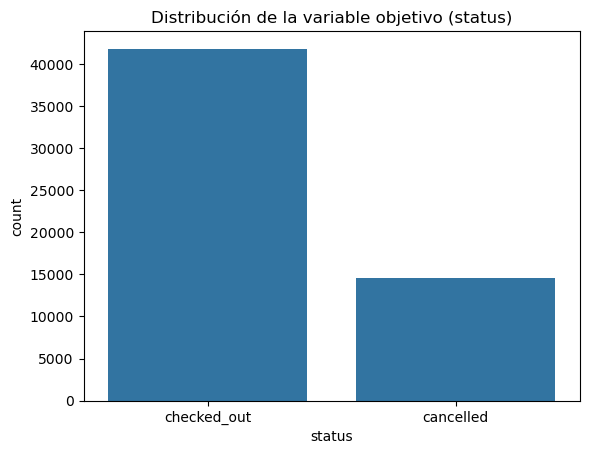

In [8]:
sns.countplot(data=df, x = "status")
plt.title("Distribución de la variable objetivo (status)")
plt.show()

In [9]:
df['status'].unique()

array(['checked_out', 'cancelled'], dtype=object)

In [10]:
#Convertir a 0 y 1
#Por convención, podemos usar 1 = check out, 0 = cancelled
df['status'] = df['status'].map({'cancelled': 0, 'checked_out': 1})
print(df)

                 booked_at         checkin_time        checkout_time  \
0      Nov 26, 2022, 16:10   Jan 1, 2023, 12:00   Jan 2, 2023, 12:00   
1      Dec 21, 2022, 17:27   Jan 1, 2023, 13:09  Jan 10, 2023, 12:00   
2      Sep 21, 2022, 19:46   Jan 1, 2023, 15:00   Jan 7, 2023, 12:00   
3      Sep 24, 2022, 12:09   Jan 1, 2023, 15:00   Jan 2, 2023, 12:00   
4      Oct 18, 2022, 07:12   Jan 1, 2023, 15:00   Jan 2, 2023, 12:00   
...                    ...                  ...                  ...   
56443  Oct 13, 2023, 13:38  Dec 31, 2023, 15:00   Jan 1, 2024, 11:00   
56444  Oct 13, 2023, 13:38  Dec 31, 2023, 15:00   Jan 1, 2024, 11:00   
56445  Oct 17, 2023, 08:36  Dec 31, 2023, 15:00   Jan 1, 2024, 11:00   
56446  Oct 17, 2023, 08:36  Dec 31, 2023, 15:00   Jan 1, 2024, 11:00   
56447  Dec 30, 2023, 08:02  Dec 31, 2023, 15:00   Jan 2, 2024, 11:00   

       lead_time  lenght_of_stay checkin_month checkin_day  adult_count  \
0             36               1       January      Sunday  

In [ ]:
# 1. Convertir fechas
columnas_fechas = [
    'booked_at', 'checkin_time', 'checkout_time',
    'asset_opening_date', 'last_entry_form_completed_at', 'cancelled_at'
]

for col in columnas_fechas:
    df[col] = pd.to_datetime(df[col])

# 2. Crear columnas año
df["year_booked_at"] = df["booked_at"].dt.year
df["year_checkin_time"] = df["checkin_time"].dt.year
df["year_checkout_time"] = df["checkout_time"].dt.year
df["year_asset_opening_date"] = df["asset_opening_date"].dt.year
df["year_last_entry_form_completed_at"] = df["last_entry_form_completed_at"].dt.year
df["year_cancelled_at"] = df["cancelled_at"].dt.year

# 3. ELIMINAR fechas originales
df = df.drop(columns=columnas_fechas)


C:\Users\gabov\AppData\Local\Temp\ipykernel_11692\2057269972.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\gabov\AppData\Local\Temp\ipykernel_11692\2057269972.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\gabov\AppData\Local\Temp\ipykernel_11692\2057269972.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\gabov\AppData\Local\Temp\ipykernel_11692\2057269972.py:8: UserWarning: Could not infer format, so each element will be parsed indi

In [18]:
# 4. Definir X e y
X = df.drop('status', axis=1)
y = df["status"]

X = pd.get_dummies(X, drop_first=True)

# 2. Eliminar columnas con demasiados valores únicos
cols_descartar = ['lead_time', 'cancellation_lead_time', 'lenght_of_stay', 'recurrence']
X = X.drop(columns=cols_descartar)

# 5. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Entrenar modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

MemoryError: Unable to allocate 15.3 GiB for an array with shape (45453, 45158) and data type float64

In [17]:
cols_descartar = ['lead_time', 'cancellation_lead_time', 'lenght_of_stay', 'recurrence']
X = X.drop(columns=cols_descartar)

Index(['booked_at', 'checkin_time', 'checkout_time', 'lead_time',
       'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count',
       'child_count', 'origin', 'travel_agency_name', 'requested_category',
       'requested_category_name', 'asset', 'asset_type', 'brand',
       'asset_opening_date', 'available_units', 'business_segment', 'rate',
       'rate_group_name', 'rate_type', 'completed_entry_forms_count',
       'all_entry_forms_completed', 'last_entry_form_completed_at',
       'returning_inhabitant', 'recurrence', 'libere_community',
       'bought_products', 'product_count', 'reservation_net_value',
       'total_adr', 'status', 'cancelled_at', 'cancellation_reason',
       'cancellation_lead_time', 'target'],
      dtype='object')